In [2]:
data_file_path="/config/workspace/finance_artifact/data_ingestion/feature_store/finance_complaint"


In [3]:
cd ..


/config/workspace


In [4]:
from finance_complaint.config.spark_manager import spark_session

:: loading settings :: url = jar:file:/usr/local/spark-3.2.1-bin-hadoop3.2/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /config/.ivy2/cache
The jars for the packages stored in: /config/.ivy2/jars
com.amazonaws#aws-java-sdk added as a dependency
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ceb9df33-1323-4814-9354-7ff3b24648aa;1.0
	confs: [default]
	found com.amazonaws#aws-java-sdk;1.7.4 in central
	found commons-logging#commons-logging;1.1.1 in central
	found org.apache.httpcomponents#httpclient;4.2 in central
	found org.apache.httpcomponents#httpcore;4.2 in central
	found commons-codec#commons-codec;1.3 in central
	found com.fasterxml.jackson.core#jackson-core;2.1.1 in central
	found com.fasterxml.jackson.core#jackson-databind;2.1.1 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.1.1 in central
	found joda-time#joda-time;2.12.2 in central
	[2.12.2] joda-time#joda-time;[2.2,)
	found org.apache.hadoop#hadoop-aws;2.7.3 in central
	found org.apache.hadoop#hadoop-common;2.7.3 in central
	found

In [5]:
df = spark_session.read.parquet(data_file_path) 

In [6]:
df.count() 

262127

In [7]:
from pyspark.sql.functions import col

In [8]:
df.count()

262127

In [9]:
df.columns

['company',
 'company_public_response',
 'company_response',
 'complaint_id',
 'complaint_what_happened',
 'consumer_consent_provided',
 'consumer_disputed',
 'date_received',
 'date_sent_to_company',
 'issue',
 'product',
 'state',
 'sub_issue',
 'sub_product',
 'submitted_via',
 'tags',
 'timely',
 'zip_code']

In [10]:
df.select(col('state').alias(f'g_state')).groupby(f'g_state').count().withColumn('freq_count', col('count')).show()

+--------------------+-----+----------+
|             g_state|count|freq_count|
+--------------------+-----+----------+
|UNITED STATES MIN...|   25|        25|
|                  AZ| 4467|      4467|
|                  SC| 5637|      5637|
|                  LA| 5272|      5272|
|                  MN| 1746|      1746|
|                  AA|    2|         2|
|                  NJ| 8437|      8437|
|                  DC| 1148|      1148|
|                  OR| 1081|      1081|
|                  VA| 6476|      6476|
|                null|  454|       454|
|                  RI|  472|       472|
|                  KY| 1249|      1249|
|                  WY|  109|       109|
|                  NH|  282|       282|
|                  MI| 6693|      6693|
|                  NV| 4413|      4413|
|                  WI| 2096|      2096|
|                  ID|  356|       356|
|                  CA|26214|     26214|
+--------------------+-----+----------+
only showing top 20 rows



In [11]:
df = df.select(col('state').alias(f'g_state')).groupby(f'g_state').count().withColumn('freq_count', col('count'))


In [12]:
df = df.drop('count')

In [13]:
df.show()

+--------------------+----------+
|             g_state|freq_count|
+--------------------+----------+
|UNITED STATES MIN...|        25|
|                  AZ|      4467|
|                  SC|      5637|
|                  LA|      5272|
|                  MN|      1746|
|                  AA|         2|
|                  NJ|      8437|
|                  DC|      1148|
|                  OR|      1081|
|                  VA|      6476|
|                null|       454|
|                  RI|       472|
|                  KY|      1249|
|                  WY|       109|
|                  NH|       282|
|                  MI|      6693|
|                  NV|      4413|
|                  WI|      2096|
|                  ID|       356|
|                  CA|     26214|
+--------------------+----------+
only showing top 20 rows



In [14]:
df.collect()

[Row(g_state='UNITED STATES MINOR OUTLYING ISLANDS', freq_count=25),
 Row(g_state='AZ', freq_count=4467),
 Row(g_state='SC', freq_count=5637),
 Row(g_state='LA', freq_count=5272),
 Row(g_state='MN', freq_count=1746),
 Row(g_state='AA', freq_count=2),
 Row(g_state='NJ', freq_count=8437),
 Row(g_state='DC', freq_count=1148),
 Row(g_state='OR', freq_count=1081),
 Row(g_state='VA', freq_count=6476),
 Row(g_state=None, freq_count=454),
 Row(g_state='RI', freq_count=472),
 Row(g_state='KY', freq_count=1249),
 Row(g_state='WY', freq_count=109),
 Row(g_state='NH', freq_count=282),
 Row(g_state='MI', freq_count=6693),
 Row(g_state='NV', freq_count=4413),
 Row(g_state='WI', freq_count=2096),
 Row(g_state='ID', freq_count=356),
 Row(g_state='CA', freq_count=26214),
 Row(g_state='CT', freq_count=2044),
 Row(g_state='NE', freq_count=395),
 Row(g_state='MT', freq_count=243),
 Row(g_state='NC', freq_count=10416),
 Row(g_state='VT', freq_count=86),
 Row(g_state='MD', freq_count=7059),
 Row(g_state='DE

In [15]:
df.collect()[0]

Row(g_state='UNITED STATES MINOR OUTLYING ISLANDS', freq_count=25)

In [16]:
df.collect()[0].g_state

'UNITED STATES MINOR OUTLYING ISLANDS'

In [17]:
df.collect()[0].freq_count

25

In [18]:
spark_session.createDataFrame(df.collect()).show()

+--------------------+----------+
|             g_state|freq_count|
+--------------------+----------+
|UNITED STATES MIN...|        25|
|                  AZ|      4467|
|                  SC|      5637|
|                  LA|      5272|
|                  MN|      1746|
|                  AA|         2|
|                  NJ|      8437|
|                  DC|      1148|
|                  OR|      1081|
|                  VA|      6476|
|                null|       454|
|                  RI|       472|
|                  KY|      1249|
|                  WY|       109|
|                  NH|       282|
|                  MI|      6693|
|                  NV|      4413|
|                  WI|      2096|
|                  ID|       356|
|                  CA|     26214|
+--------------------+----------+
only showing top 20 rows



In [20]:
df = spark_session.read.parquet(data_file_path)
df

DataFrame[company: string, company_public_response: string, company_response: string, complaint_id: string, complaint_what_happened: string, consumer_consent_provided: string, consumer_disputed: string, date_received: string, date_sent_to_company: string, issue: string, product: string, state: string, sub_issue: string, sub_product: string, submitted_via: string, tags: string, timely: string, zip_code: string]

In [21]:
df.columns

['company',
 'company_public_response',
 'company_response',
 'complaint_id',
 'complaint_what_happened',
 'consumer_consent_provided',
 'consumer_disputed',
 'date_received',
 'date_sent_to_company',
 'issue',
 'product',
 'state',
 'sub_issue',
 'sub_product',
 'submitted_via',
 'tags',
 'timely',
 'zip_code']

In [22]:
df.createOrReplaceTempView("complaint")

In [23]:
## sql query in pyspark
df1 = spark_session.sql('select state,count(*) as freq_count from complaint group by state')


In [26]:
!pip install Pandas 

  Using cached pandas-1.5.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
     |████████████████████████████████| 17.3 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 499 kB 66.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [27]:
## converting to pandas dataframe
df1.toPandas()

,state,freq_count
0,UNITED STATES MINOR OUTLYING ISLANDS,25
1,AZ,4467
2,SC,5637
3,LA,5272
4,MN,1746
5,AA,2
6,NJ,8437
7,DC,1148
8,OR,1081
9,VA,6476


In [28]:
!pip install matplotlib

     |████████████████████████████████| 9.4 MB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 69.5 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 61.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


<AxesSubplot: ylabel='Frequency'>

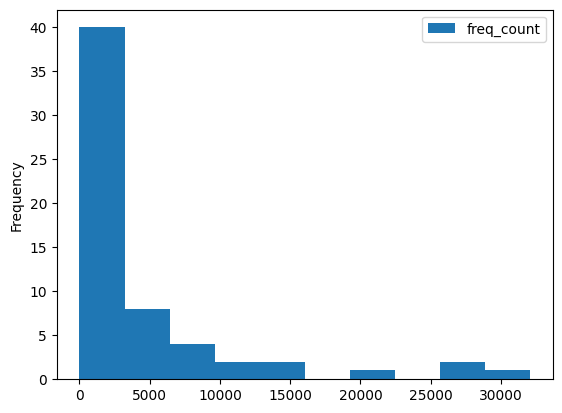

In [29]:
df1.toPandas().plot(kind = "hist")

## Conf

In [ ]:
def update_column_attribute(df):
    for column in df.columns:
        setattr(df,column,column)

In [ ]:
update_column_attribute(df)

## Printing unique values in each column

In [ ]:
for column in df.columns:
    print(f"{column}:{df.select(column).distinct().count()}")

company:6464
company_public_response:12
company_response:9
complaint_id:2774363
complaint_what_happened:892308
consumer_consent_provided:6
consumer_disputed:3
date_received:3833
date_sent_to_company:3834
issue:165
product:18
state:64
sub_issue:222
sub_product:77
submitted_via:7
tags:4
timely:2
zip_code:34118


In [ ]:
complaint_table="complaint"
df.createOrReplaceTempView(complaint_table)

In [ ]:
sql = spark_session.sql

In [ ]:
n_row = df.count()

In [ ]:
#Target column
df.groupBy(df.consumer_disputed).count().collect()

+-----------------+-------+
|consumer_disputed|  count|
+-----------------+-------+
|              N/A|2017177|
|               No| 621087|
|              Yes| 148511|
+-----------------+-------+



In [ ]:
df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_public_response: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_id: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sub_issue: string (nullable = true)
 |-- sub_product: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)



In [ ]:
missing_target_df = sql(f"select * from {complaint_table} where {df.consumer_disputed} ='N/A' ")

In [ ]:
df = sql(f"select * from {complaint_table} where {df.consumer_disputed} <>'N/A' ")

In [ ]:
complaint_table="complaint"
df.createOrReplaceTempView(complaint_table)

In [ ]:
update_column_attribute(df)

In [ ]:

def perform_null_analysis(df,table_name):
    null_value_analysis=[]
    n_row=df.count()
    for column in df.columns:
        print(column)
        response = sql(f"select {n_row} as  total_row,count(*) as null_row_{column},(count(*)*100)/{n_row} as missing_percentage,'{column}' as  column_name from {table_name} where {column} is null").collect()
        null_value_analysis.append(response)
    return null_value_analysis

In [ ]:
null_report = perform_null_analysis(df,complaint_table)

company
company_public_response
company_response
complaint_id
complaint_what_happened
consumer_consent_provided
consumer_disputed
date_received
date_sent_to_company
issue
product
state
sub_issue
sub_product
submitted_via
tags
timely
zip_code


In [ ]:
def unwanted_column_by_missing_percentage(null_value_analysis,per_thres=20):
    columns= []
    for row in null_value_analysis:
        row_info=row[0]
        if row_info.missing_percentage>per_thres:
            print(row_info)
            columns.append(row_info.column_name)

    return columns


In [ ]:
columns = unwanted_column_by_missing_percentage(null_value_analysis=null_report)

Row(total_row=769598, null_row_company_public_response=572886, missing_percentage=74.4396425146635, column_name='company_public_response')
Row(total_row=769598, null_row_sub_issue=454896, missing_percentage=59.10826171585685, column_name='sub_issue')
Row(total_row=769598, null_row_sub_product=235106, missing_percentage=30.549195813918434, column_name='sub_product')
Row(total_row=769598, null_row_tags=660916, missing_percentage=85.8780818037469, column_name='tags')


In [ ]:
def drop_column(df,columns):
    selected_column = list(filter(lambda x:x not in columns,df.columns))
    selected_column = ",".join(selected_column)
    df= sql(f"select {selected_column}  from {complaint_table} ")
    return df

In [ ]:
df=drop_column(df,columns)

In [ ]:
columns = perform_null_analysis(df,complaint_table)

company
company_response
complaint_id
complaint_what_happened
consumer_consent_provided
consumer_disputed
date_received
date_sent_to_company
issue
product
state
submitted_via
timely
zip_code


In [ ]:
unwanted_column_by_missing_percentage(columns)

[]

In [ ]:
#dropping feature as we have found more than 20% of null value in above columns

In [ ]:
df.collect()

+--------------------+--------------------+------------+-----------------------+-------------------------+-----------------+--------------------+--------------------+--------------------+--------------------+-----+-------------+------+--------+
|             company|    company_response|complaint_id|complaint_what_happened|consumer_consent_provided|consumer_disputed|       date_received|date_sent_to_company|               issue|             product|state|submitted_via|timely|zip_code|
+--------------------+--------------------+------------+-----------------------+-------------------------+-----------------+--------------------+--------------------+--------------------+--------------------+-----+-------------+------+--------+
|       EQUIFAX, INC.|Closed with expla...|     2390217|                       |     Consent not provided|               No|2017-03-16T12:00:...|2017-03-17T12:00:...|Credit monitoring...|    Credit reporting|   CT|          Web|   Yes|   06226|
|TRANSUNION INTERM..

In [ ]:
## Unique values in each columns



Total number of row: 769598


In [ ]:
print(f"Total number of row: {df.count()}")
for column in df.columns:
    print(f"{column}:{df.select(column).distinct().count()}")

company:4284
company_response:7
complaint_id:765945
complaint_what_happened:160969
consumer_consent_provided:6
consumer_disputed:2
date_received:1940
date_sent_to_company:2024
issue:99
product:13
state:63
submitted_via:6
timely:2
zip_code:28717


In [ ]:
update_column_attribute(df)

In [ ]:
df=drop_column(df,columns=[df.complaint_id])

In [ ]:
update_column_attribute(df)

In [ ]:
df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: string (nullable = true)
 |-- date_sent_to_company: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)



In [ ]:
print(f"Total number of row: {df.count()}")
for column in df.columns:
    print(f"{column}:{df.select(column).distinct().count()}")

Total number of row: 769598
company:4284
company_response:7
complaint_what_happened:160969
consumer_consent_provided:6
consumer_disputed:2
date_received:1940
date_sent_to_company:2024
issue:99
product:13
state:63
submitted_via:6
timely:2
zip_code:28717


In [ ]:
df.groupBy(df.company_response).count().show()
df.groupBy(df.consumer_consent_provided).count().show()
df.groupBy(df.consumer_disputed).count().show()
df.groupBy(df.product).count().show()
df.groupBy(df.submitted_via).count().show()
df.groupBy(df.timely).count().show()


+--------------------+------+
|    company_response| count|
+--------------------+------+
|   Untimely response|  2901|
|Closed with non-m...| 95968|
|Closed with monet...| 51597|
|Closed with expla...|580728|
|              Closed| 17691|
|Closed without re...| 16061|
|  Closed with relief|  4652|
+--------------------+------+

+-------------------------+------+
|consumer_consent_provided| count|
+-------------------------+------+
|                     null|    38|
|        Consent withdrawn|     8|
|                    Other|  8492|
|         Consent provided|164887|
|     Consent not provided|125995|
|                      N/A|470178|
+-------------------------+------+

+-----------------+------+
|consumer_disputed| count|
+-----------------+------+
|               No|621087|
|              Yes|148511|
+-----------------+------+

+--------------------+------+
|             product| count|
+--------------------+------+
|     Debt collection|146584|
|    Virtual currency|    18|
|    

In [ ]:

df.groupBy(df.company_response).count().collect()
df.groupBy(df.consumer_consent_provided).count().collect()
df.groupBy(df.consumer_disputed).count().collect()
df.groupBy(df.product).count().collect()
df.groupBy(df.submitted_via).count().collect()
df.groupBy(df.timely).count().collect()


[Row(timely='No', count=21331), Row(timely='Yes', count=748267)]

In [ ]:
df.groupBy(df.product).count().collect()

[Row(product='Debt collection', count=146584),
 Row(product='Virtual currency', count=18),
 Row(product='Payday loan', count=5580),
 Row(product='Money transfers', count=5387),
 Row(product='Checking or savings account', count=3),
 Row(product='Mortgage', count=226616),
 Row(product='Prepaid card', count=3833),
 Row(product='Credit reporting', count=141194),
 Row(product='Consumer Loan', count=31756),
 Row(product='Credit card', count=88332),
 Row(product='Bank account or service', count=86578),
 Row(product='Other financial service', count=1062),
 Row(product='Student loan', count=32655)]

In [ ]:
ONE_HOT_FEATURE = [df.company_response,df.consumer_consent_provided,df.submitted_via,df.timely]
BINARY_ENCODING = [df.product,]
TARGET_FEATURE = [df.consumer_disputed]

#df.company_response No null value
#df.consumer_consent_provided  replace null with top category 
#df.consumer_disputed target feature label encoding
#df.product one hot encoding 

#df.product no null value


In [ ]:
remaining_column = list(filter(lambda x: x not in ONE_HOT_FEATURE+BINARY_ENCODING+TARGET_FEATURE,df.columns))

In [ ]:
remaining_column

['company',
 'complaint_what_happened',
 'date_received',
 'date_sent_to_company',
 'issue',
 'state',
 'zip_code']

In [ ]:
df.groupBy(df.company).count().count()

4284

In [ ]:
FREQUENCY_ENCODING = [df.company]

In [ ]:
df.select(df.company).count()-df.select(df.company).dropna().count()


0

In [ ]:
REPLACE_NULL_WITH_TOP_VALUE = [df.zip_code,df.state,df.consumer_consent_provided]

In [ ]:
REPLACE_NULL_WITH_TOP_VALUE

['zip_code', 'state', 'consumer_consent_provided']

In [ ]:
print(f"Total number of row: {df.count()}")
for column in remaining_column:
    print(f"{column}:  {df.select(column).distinct().count()}")

Total number of row: 769598
company:  4284
complaint_what_happened:  160969
date_received:  1940
date_sent_to_company:  2024
issue:  99
state:  63
zip_code:  28717


In [ ]:
df.groupBy(df.issue).count().show()

+--------------------+------+
|               issue| count|
+--------------------+------+
|Communication tac...| 23965|
|Application proce...|   536|
|Advertising and m...|  2948|
|Balance transfer fee|   216|
|Customer service/...|   284|
|        Adding money|   202|
|Closing/Cancellin...|  6345|
|Credit card prote...|  2701|
|Received a loan I...|   619|
|Can't stop charge...|   515|
|          Bankruptcy|   447|
|                Fees|   234|
|Forbearance / Wor...|   550|
|Credit determination|  3016|
|Loan modification...|112115|
|    Cash advance fee|   193|
|Other transaction...|  1501|
|Customer service ...|  3491|
|      Getting a loan|   666|
|  Delinquent account|  3224|
+--------------------+------+
only showing top 20 rows



In [ ]:
remaining_column

['company',
 'complaint_what_happened',
 'date_received',
 'date_sent_to_company',
 'issue',
 'state',
 'zip_code']

In [ ]:
df.select(df.complaint_what_happened)[3].collect()

IndexError: list index out of range

In [ ]:
sql(f"select {df.complaint_what_happened} from {complaint_table} limit 5").collect()

[Row(complaint_what_happened=''),
 Row(complaint_what_happened=''),
 Row(complaint_what_happened=''),
 Row(complaint_what_happened='around XX/XX/2016 i got a check from tenant. I am a XXXX and I accept a check from him after that i found bedbugs that he brought from work. \nI have to give him notice for moving because my apartment had a carpet floor. \nMy roommate got a problem and moving out. and he also gave me a checked and cash in the same time. I after that time i got that the checked was report for lost. \nand Fraud also. Bank of America close my account and report me I am a thief and fraud with check. I have a paper that give him to sign and let him know about the payment after he left for bedbugs treatment. I need bank of America resolve this problem that i am a XXXX that he used to lived before he changed the address. i can proof with letter that he report that was lost. but its not he was lie to bank. Cheating on my with the checked.'),
 Row(complaint_what_happened='')]

In [ ]:
TOKENIZER_FEATURE = [df.complaint_what_happened]

In [ ]:
ONE_HOT_FEATURE

['company_response', 'consumer_consent_provided', 'submitted_via', 'timely']

In [ ]:
FREQUENCY_ENCODING = [df.company,df.issue,df.state,df.zip_code]

In [ ]:
TARGET_FEATURE

['consumer_disputed']

In [ ]:
TOKENIZER_FEATURE

['complaint_what_happened']

In [ ]:
remaining_column

['company',
 'complaint_what_happened',
 'date_received',
 'date_sent_to_company',
 'issue',
 'state',
 'zip_code']

In [ ]:
from pyspark.sql.types import TimestampType

In [ ]:
df=df.withColumn(df.date_received,col(df.date_received).cast(TimestampType()))

In [ ]:
update_column_attribute(df)

In [ ]:
df=df.withColumn(df.date_sent_to_company,col(df.date_sent_to_company).cast(TimestampType()))
df.printSchema()

root
 |-- company: string (nullable = true)
 |-- company_response: string (nullable = true)
 |-- complaint_what_happened: string (nullable = true)
 |-- consumer_consent_provided: string (nullable = true)
 |-- consumer_disputed: string (nullable = true)
 |-- date_received: timestamp (nullable = true)
 |-- date_sent_to_company: timestamp (nullable = true)
 |-- issue: string (nullable = true)
 |-- product: string (nullable = true)
 |-- state: string (nullable = true)
 |-- submitted_via: string (nullable = true)
 |-- timely: string (nullable = true)
 |-- zip_code: string (nullable = true)



In [ ]:
df.select([df.date_received,df.date_sent_to_company]).show()

+-------------------+--------------------+
|      date_received|date_sent_to_company|
+-------------------+--------------------+
|2017-03-16 17:00:00| 2017-03-17 17:00:00|
|2017-02-08 17:00:00| 2017-02-08 17:00:00|
|2017-01-25 17:00:00| 2017-01-25 17:00:00|
|2017-01-13 17:00:00| 2017-01-13 17:00:00|
|2017-01-31 17:00:00| 2017-02-07 17:00:00|
|2017-01-06 17:00:00| 2017-01-06 17:00:00|
|2017-03-01 17:00:00| 2017-03-01 17:00:00|
|2017-02-19 17:00:00| 2017-02-19 17:00:00|
|2017-02-15 17:00:00| 2017-02-15 17:00:00|
|2017-03-20 17:00:00| 2017-03-21 17:00:00|
|2017-03-08 17:00:00| 2017-03-10 17:00:00|
|2017-02-14 17:00:00| 2017-02-17 17:00:00|
|2017-02-17 17:00:00| 2017-02-23 17:00:00|
|2017-02-23 17:00:00| 2017-02-28 17:00:00|
|2017-02-03 17:00:00| 2017-02-07 17:00:00|
|2017-01-27 17:00:00| 2017-01-27 17:00:00|
|2017-02-03 17:00:00| 2017-02-03 17:00:00|
|2017-01-11 17:00:00| 2017-01-12 17:00:00|
|2017-02-14 17:00:00| 2017-02-14 17:00:00|
|2017-01-21 17:00:00| 2017-01-21 17:00:00|
+----------

In [ ]:
from pyspark.sql.types import  LongType

In [ ]:
df = df.withColumn("diff_in_days",(col(df.date_sent_to_company).cast(LongType())-col(df.date_received).cast(LongType()))/(60*60*24))

In [ ]:
update_column_attribute(df)

In [ ]:
remove_column = [df.date_received,df.date_sent_to_company]

In [ ]:
df=df.drop(col(df.date_received)).drop(col(df.date_sent_to_company))

+--------------------+--------------------+-----------------------+-------------------------+-----------------+--------------------+--------------------+-----+-------------+------+--------+------------+
|             company|    company_response|complaint_what_happened|consumer_consent_provided|consumer_disputed|               issue|             product|state|submitted_via|timely|zip_code|diff_in_days|
+--------------------+--------------------+-----------------------+-------------------------+-----------------+--------------------+--------------------+-----+-------------+------+--------+------------+
|       EQUIFAX, INC.|Closed with expla...|                       |     Consent not provided|               No|Credit monitoring...|    Credit reporting|   CT|          Web|   Yes|   06226|         1.0|
|TRANSUNION INTERM...|Closed with expla...|                       |     Consent not provided|               No|Incorrect informa...|    Credit reporting|   MO|          Web|   Yes|   63134

In [ ]:
NUMERICAL_FEATURE = [df.diff_in_days,]
ONE_HOT_FEATURE+\
FREQUENCY_ENCODING+\
BINARY_ENCODING+\
TARGET_FEATURE

['company_response',
 'consumer_consent_provided',
 'submitted_via',
 'timely',
 'company',
 'issue',
 'state',
 'zip_code',
 'issue',
 'consumer_disputed']

In [ ]:
BINARY_ENCODING

['issue']

In [ ]:
FREQUENCY_ENCODING=FREQUENCY_ENCODING+BINARY_ENCODING

In [ ]:
FREQUENCY_ENCODING.remove('issue')

In [ ]:
FREQUENCY_ENCODING

['company', 'state', 'zip_code', 'issue']

In [ ]:
ONE_HOT_FEATURE

['company_response', 'consumer_consent_provided', 'submitted_via', 'timely']

In [ ]:

data_file_path="/home/jovyan/work/finance_complaint/finance_artifact/data_preprocessing/20220907_063829/complaint_data"

In [ ]:
from finance_complaint.entity.spark_manager import spark_session
df = spark_session.read.parquet(data_file_path)

RuntimeError: Java gateway process exited before sending its port number